In [ ]:
!pip3 install scikit-learn-intelex
!pip3 install catboost
!pip3 install xgboost

     |████████████████████████████████| 69 kB 3.2 MB/s 
     |████████████████████████████████| 22.5 MB 1.2 MB/s 
     |████████████████████████████████| 284.3 MB 1.3 kB/s 
     |████████████████████████████████| 4.0 MB 44.0 MB/s 
     |████████████████████████████████| 76.1 MB 103 kB/s 


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
from __future__ import print_function
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import csr_matrix, vstack, hstack
from scipy.sparse import coo_matrix
from keras.preprocessing.text import one_hot
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation , Flatten
from sklearn.metrics import log_loss
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling1D
from tensorflow.keras.layers import Embedding
import tensorflow as tf

from scipy import sparse
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

import sklearn
from sklearn.metrics.pairwise import manhattan_distances
from keras.models import Model
from keras.layers import  Conv1D, multiply, GlobalMaxPool1D, Input , Lambda
import time
import argparse

from numpy import *
import os.path as osp
import scipy.sparse as sp
import pickle
from sklearn.metrics import accuracy_score
from warnings import simplefilter

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

np.random.seed(42)

In [ ]:
from sklearn.metrics import precision_recall_curve
def plot_conf_matrix(Y_val, Y_val_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_val, Y_val_preds),
                     annot=True,
                     cbar=False,
                     fmt='d')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

In [ ]:
def plot_conf_matrix_from_matrix(cm, title):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(cm,
                     annot=True,
                     cbar=False,
                     fmt='d')
    plt.title(label=title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

In [ ]:
def relevant_features(data, response_vector, features):
    rel_features = list()
    ranked_index=list()
    
    model = RandomForestRegressor()
    #rfe = RFE(model, 1)
    rfe = RFE(model, verbose=1)
    fit = rfe.fit(data, response_vector)
    old_features=features

    for i in fit.ranking_:
        if i<len(features):
              rel_features.append(features[i])
    #print('Relative features:', rel_features)
    #print('Old features:', old_features)
    # for x in rel_features:
    #     if x in old_features:
    #         print(x, ':', features.to_list().index(x))
    ranked_index=[old_features.to_list().index(x) for x in rel_features if x in old_features]
       
    return rel_features ,ranked_index

In [ ]:
import pandas as pd
# input_data = pd.read_csv('/content/drive/MyDrive/CICIDS/converted_poisoned_1_percent_sample.csv', index_col='Unnamed: 0')
# input_data = pd.read_csv('/content/drive/MyDrive/CICIDS/Converted-Processed-CICIDS.csv', index_col='Unnamed: 0')

input_tables = input_data.copy()
input_tables.reset_index(inplace=True)
input_tables.drop(['index'], axis=1, inplace=True)
features = input_tables.columns

In [ ]:
### Modifying labels to binary values
dl = input_data.copy()
for index, row in dl.iterrows():
  if row['Label'] == 'BENIGN':
    dl.at[index, 'Label'] = 0
  else:
    dl.at[index, 'Label'] = 1
dl2 = dl['Label']
dl2 = dl2.astype('int')

In [ ]:
### Saving
data_filename = '/content/drive/MyDrive/Dissertation/gan_data.sav'
pickle.dump(data, open(data_filename, 'wb'))
dl2_filename = '/content/drive/MyDrive/Dissertation/gan_dl2_data.sav'
pickle.dump(dl2, open(dl2_filename, 'wb'))

In [ ]:
### Loading
# data_filename = '/content/drive/MyDrive/Dissertation/gan_data.sav'
# data = pickle.load(open(data_filename, 'rb'))
# dl2_filename = '/content/drive/MyDrive/Dissertation/gan_dl2_data.sav'
# dl2 = pickle.load(open(dl2_filename, 'rb'))

In [ ]:
Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
cols = data.select_dtypes(include=['float64','int64']).columns
sc_data = scaler.fit_transform(data.select_dtypes(include=['float64','int64']))
data = pd.DataFrame(sc_data, columns = cols)

In [ ]:
data.columns[data.isnull().any()]

In [ ]:
print("*****************************************************************************************")
print("********Using Benign Distribution + Random Forest Classifier + GAN countermeasure********") 
print("*****************************************************************************************")

In [ ]:
### Commented out because completed
#Doing feature Ranking on all of the Data
print("************************Doing feature Ranking on all of the Data*************************")
t0=time.time()
r_features, ranked_index = relevant_features(data, dl2, features)
t1=time.time()
print("Time of Feature Ranking=",t1-t0)
print("******************************************************************************************")

In [ ]:

r_features_filename = '/content/drive/MyDrive/Dissertation/gan_r_features.sav'
pickle.dump(r_features, open(r_features_filename, 'wb'))
ranked_index_filename = '/content/drive/MyDrive/Dissertation/gan_ranked_index.sav'
pickle.dump(ranked_index, open(ranked_index_filename, 'wb'))

In [ ]:
r_features_filename = '/content/drive/MyDrive/Dissertation/gan_r_features.sav'
r_features = pickle.load (open(r_features_filename, 'rb'))
ranked_index_filename = '/content/drive/MyDrive/Dissertation/gan_ranked_index.sav'
ranked_index = pickle.load(open(ranked_index_filename, 'rb'))

In [ ]:
original_selected = ranked_index[1:69]

In [ ]:
seed = 10
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(data, dl2, test_size=test_size, random_state=seed)
test_size = 0.25
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=test_size, random_state=seed)
X_train.columns=cols
X_test.columns=cols
X_val.columns=cols
Y_train.columns='Label'
Y_test.columns='Label'
Y_val.columns='Label'

In [ ]:
#**************************************************************************
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=10, shuffle=True)
RFC_Classifier = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

#### Testing overfitting
test_num_trees = 500
# test_max_features = 5
test_max_features = 'auto'
test_max_depth = 8
test_criterion = 'entropy'
test_kfold = KFold(n_splits=10, random_state=10, shuffle=True)
Test_RFC_Classifier = RandomForestClassifier(n_estimators=test_num_trees, max_features=test_max_features, max_depth=test_max_depth, criterion=test_criterion)
### End of of testing overfitting

cat_features = [0, 1]
CB_Classifier = CatBoostClassifier(max_depth=5, 
                                n_estimators=300, 
                                learning_rate=1,
                                logging_level='Silent')
XGB_Classifier = XGBClassifier()
BNB_Classifier = BernoulliNB()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)

models = []
models.append(('Random Forest Classifier', RFC_Classifier))
#models.append(('Tuned Random Forest Classifier', Test_RFC_Classifier))
# models.append(('CatBoost Classifier', CB_Classifier))
#models.append(('XGB Classifier', XGB_Classifier))
#models.append(('Naive Baye Classifier', BNB_Classifier))
#models.append(('Decision Tree Classifier', DTC_Classifier))
#models.append(('Logistic Regression', LGR_Classifier))
#models.append(('KNeighbors Classifier', KNN_Classifier))

for i, v in models:
    print()
    print('============================== {} Model Fitting  =============================='.format(i))
    print()
    t0=time.time()
    v = v.fit(X_train, Y_train)
    t1=time.time()
    print("Time for Fitting of {} =".format(i), t1-t0)

In [ ]:
models_filename = '/content/drive/MyDrive/Dissertation/gan_models.sav'
pickle.dump(models, open(models_filename, 'wb'))

In [ ]:
# models_filename = '/content/drive/MyDrive/Dissertation/gan_models.sav'
# models = pickle.load(open(models_filename, 'rb'))

In [ ]:
original_results = [{'Train accuracy': [], 'Test accuracy': [], 'Val accuracy': [], 'Test prediction': [], 'Val prediction': [], 'Train logarithmic loss': [], 'Test logarithmic loss': [], 'Val logarithmic loss': [], 'Train ROC curve': [], 'Train AUC curve': [], 'Test ROC curve': [], 'Test AUC curve': [], 'Val ROC curve': [], 'Val AUC curve': [], 'Confusion matrix': []}] # ,
                    # {'Train accuracy': [], 'Test accuracy': [], 'Val accuracy': [], 'Test prediction': [], 'Val prediction': [], 'Train logarithmic loss': [], 'Test logarithmic loss': [], 'Val logarithmic loss': [], 'Train ROC curve': [], 'Train AUC curve': [], 'Test ROC curve': [], 'Test AUC curve': [], 'Val ROC curve': [], 'Val AUC curve': [], 'Confusion matrix': []}]



In [ ]:
#### Fixing overfitting
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

results_count = 0

for i, v in models:
    t0=time.time()
    print("************************************Result without attack for {}*******************************************************************************************".format(i))
    # Compute Classification Accuracy in train and test and Validation
    #********************* Compute Classification Accuracy in train*********************************
    scoring = 'accuracy'
    results = model_selection.cross_val_score(v, X_train,Y_train, cv=kfold, scoring=scoring)
    original_results[results_count]['Train accuracy'].append([i, results])
    print(("The accuracy of Classification in train: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Classification Accuracy in test*********************************
    scoring = 'accuracy'
    results = model_selection.cross_val_score(v, X_test, Y_test, cv=kfold, scoring=scoring)
    original_results[results_count]['Test accuracy'].append([i, results])
    print(("The accuracy of Classification in test: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Classification Accuracy in validation***************************
    scoring = 'accuracy'
    results = model_selection.cross_val_score(v, X_val,Y_val, cv=kfold, scoring=scoring)
    original_results[results_count]['Val accuracy'].append([i, results])
    print(("The accuracy of Classification in validation: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Classification Accuracy in test********************************
    predictions = v.predict(X_test)
    original_results[results_count]['Test prediction'].append([i, predictions])
    print("classification_report by test:")
    print(classification_report(Y_test, predictions))
    #********************* Compute Classification Accuracy in Validation***************************
    predictions_val = v.predict(X_val)
    original_results[results_count]['Val prediction'].append([i, predictions_val])
    print("classification_report by validation:")
    print(classification_report(Y_val, predictions_val))
    #********************* Compute Logarithmic Loss in Train*********************************
    scoring = 'neg_log_loss'
    results = model_selection.cross_val_score(v, X_train,Y_train, cv=kfold, scoring=scoring)
    original_results[results_count]['Train logarithmic loss'].append([i, results])
    print(("The Loss of Classification in train data: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Logarithmic Loss in Test***********************************
    scoring = 'neg_log_loss'
    results = model_selection.cross_val_score(v, X_test,Y_test, cv=kfold, scoring=scoring)
    original_results[results_count]['Test logarithmic loss'].append([i, results])
    print(("The Loss of Classification in test data:: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Logarithmic Loss in validation**************************** 
    scoring = 'neg_log_loss'
    results = model_selection.cross_val_score(v, X_val,Y_val, cv=kfold, scoring=scoring)
    original_results[results_count]['Val logarithmic loss'].append([i, results])
    print(("The Loss of Classification in validation data:: %.3f (%.3f)") % (results.mean(), results.std()))
    #********************* Compute Area Under ROC Curve in Train******************************
    scoring = 'roc_auc'
    results = model_selection.cross_val_score(v, X_train,Y_train, cv=kfold, scoring=scoring)
    original_results[results_count]['Train ROC curve'].append([i, results])
    print(("The Area Under ROC Curve in Train: %.3f (%.3f)") % (results.mean(), results.std()))
    auc_curve = RocCurveDisplay.from_predictions(Y_train, Y_train)
    original_results[results_count]['Train AUC curve'].append([i, auc_curve])
    plt.show()
    #********************* Compute Area Under ROC Curve in Test*******************************
    scoring = 'roc_auc'
    results = model_selection.cross_val_score(v, X_test,Y_test, cv=kfold, scoring=scoring)
    original_results[results_count]['Test ROC curve'].append([i, results])
    print(("The Area Under ROC Curve in test: %.3f (%.3f)") % (results.mean(), results.std()))
    auc_curve = RocCurveDisplay.from_predictions(Y_test, predictions)
    original_results[results_count]['Test AUC curve'].append([i, auc_curve])
    plt.show()
    #********************* Compute Area Under ROC Curve in Validation*************************
    scoring = 'roc_auc'
    results = model_selection.cross_val_score(v, X_val,Y_val, cv=kfold, scoring=scoring)
    original_results[results_count]['Val ROC curve'].append([i, results])
    print(("The Area Under ROC Curve in Validation: %.3f (%.3f)") % (results.mean(), results.std()))
    auc_curve = RocCurveDisplay.from_predictions(Y_val, predictions_val)
    original_results[results_count]['Val AUC curve'].append([i, auc_curve])
    plt.show()
    #*****************************Compute FPR and TPR in Validation**************************
    cm=confusion_matrix(Y_test, predictions)
    original_results[results_count]['Confusion matrix'].append([i, cm])
    print("confusion_matrix:")
    print(cm)
    TP=cm[0][0]
    print("TP:",TP)
    FP=cm[0][1]
    print("FP:",FP)
    FN=cm[1][0]
    print("FN:",FN)
    TN=cm[1][1]
    print("TN:",TN)
    FPR=FP/(FP+TN)
    print("The FPR result:", FPR)
    TPR=TP/(TP+FN)
    print("The TPR result:", TPR)

    TNR=TN/(TN+FP)
    print("The TNR result:", TNR)

    FNR=FN/(FN+TP)
    print("The FNR result:", FNR)

    AUC=1/(2*((TN/(TN+FP))+(TP/(TP+FP))))
    print("The AUC result:", AUC)

    ACC=(TP+TN)/(TP+TN+FP+FN)
    print("The ACC result:", ACC)

    #MCC=(TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    #print("The Matthews correlation coefficient result=", MCC)

    t1=time.time()
    print()
    print("Time for gathering information for {} :".format(i), t1-t0)
    print()
    print("*******************************End of Result without attack for {}*****************************************************************************************".format(i))
    print()
    #*************************************************************************************************************************************************************
    results_count = results_count + 1

In [ ]:
### Saving
original_results_filename = '/content/drive/MyDrive/Dissertation/original_results.sav'
pickle.dump(original_results, open(original_results_filename, 'wb'))

In [ ]:
### Loading
# original_results_filename = '/content/drive/MyDrive/Dissertation/original_results.sav'
# original_results = pickle.load(open(original_results_filename, 'rb'))

In [ ]:
Saving
X_train_filename = '/content/drive/MyDrive/Dissertation/gan_X_train.sav'
pickle.dump(X_train, open(X_train_filename, 'wb'))
X_test_filename = '/content/drive/MyDrive/Dissertation/gan_X_test.sav'
pickle.dump(X_test, open(X_test_filename, 'wb'))
X_val_filename = '/content/drive/MyDrive/Dissertation/gan_X_val.sav'
pickle.dump(X_val, open(X_val_filename, 'wb'))
Y_train_filename = '/content/drive/MyDrive/Dissertation/gan_Y_train.sav'
pickle.dump(Y_train, open(Y_train_filename, 'wb'))
Y_test_filename = '/content/drive/MyDrive/Dissertation/gan_Y_test.sav'
pickle.dump(Y_test, open(Y_test_filename, 'wb'))
Y_val_filename = '/content/drive/MyDrive/Dissertation/gan_Y_val.sav'
pickle.dump(Y_val, open(Y_val_filename, 'wb'))

In [ ]:
### Loading
# X_train_filename = '/content/drive/MyDrive/Dissertation/gan_X_train.sav'
# X_train = pickle.load(open(X_train_filename, 'rb'))
# X_test_filename = '/content/drive/MyDrive/Dissertation/gan_X_test.sav'
# X_test = pickle.load(open(X_test_filename, 'rb'))
# X_val_filename = '/content/drive/MyDrive/Dissertation/gan_X_val.sav'
# X_val = pickle.load(open(X_val_filename, 'rb'))
# Y_train_filename = '/content/drive/MyDrive/Dissertation/gan_Y_train.sav'
# Y_train = pickle.load(open(Y_train_filename, 'rb'))
# Y_test_filename = '/content/drive/MyDrive/Dissertation/gan_Y_test.sav'
# Y_test = pickle.load(open(Y_test_filename, 'rb'))
# Y_val_filename = '/content/drive/MyDrive/Dissertation/gan_Y_val.sav'
# Y_val = pickle.load(open(Y_val_filename, 'rb'))



In [ ]:
##### NEW CONVERSION - Finding Malware of test data
t0=time.time()
malware_test= X_test.copy(deep=True)
cl_malware=list()
z_m=0    
count_m=0
drop_list = []
for i, j in enumerate(Y_test):
    if j == 1:
    # if j == 0:
        drop_list.append(X_test.index[i])
        count_m=count_m+1
    else:
        cl_malware.insert(z_m, 1)
        z_m=z_m+1
drop_list.sort(reverse=True)
malware_test.drop(drop_list, inplace=True)
t1=time.time()
print("Time of Feature Ranking=",t1-t0)

Time of Feature Ranking= 0.5988039970397949


In [ ]:
cl_malware_test_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_malware_test.sav'
pickle.dump(cl_malware, open(cl_malware_test_filename, 'wb'))
malware_test_filename = '/content/drive/MyDrive/Dissertation/new/gan_malware_test.sav'
pickle.dump(malware_test, open(malware_test_filename, 'wb'))

In [ ]:
# cl_malware_test_filename = '/content/drive/MyDrive/Dissertation/gan_cl_malware_test.sav'
# cl_malware = pickle.load(open(cl_malware_test_filename, 'rb'))
# malware_test_filename = malware_test_filename = '/content/drive/MyDrive/Dissertation/new/gan_malware_test.sav'
# malware_test = pickle.load(malware_test, open(malware_test_filename, 'rb'))

In [ ]:
##### New CONVERTED - Finding Benign of test data
t0=time.time()
benign_test= X_test.copy(deep=True)
cl_benign=list()
z_b=0    
count_b=0
drop_list = []
for i, j in enumerate(Y_test):
    if j == 0:
    # if j == 1:
        drop_list.append(X_test.index[i])
        count_b=count_b+1
    else:
        cl_benign.insert(z_b, 1)
        z_b=z_b+1
drop_list.sort(reverse=True)
benign_test.drop(drop_list, inplace=True)
t1=time.time()
print("Time of Feature Ranking=",t1-t0)
#**************************
# print(type(X_test))
# print(X_test.shape)
# print(len(cl_benign))
# print(benign_test.shape)
# print(z_b)
# print(count_b)

Time of Feature Ranking= 1.132333755493164


In [ ]:
cl_benign_test_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_benign_test.sav'
pickle.dump(cl_benign, open(cl_benign_test_filename, 'wb'))
benign_test_filename = '/content/drive/MyDrive/Dissertation/new/gan_benign_test.sav'
pickle.dump(benign_test, open(benign_test_filename, 'wb'))

In [ ]:
# cl_benign_test_filename = '/content/drive/MyDrive/Dissertation/gan_cl_benign_test.sav'
# cl_benign = pickle.load(open(cl_benign_test_filename, 'rb'))
# gan_benign_test_filename = '/content/drive/MyDrive/Dissertation/gan_benign_test.sav'
# benign_test = pickle.load(open(gan_benign_test_filename, 'rb'))

In [ ]:
#### New CONVERTED - Finding Malware of Train data
t0 = time.time()
malware_train = X_train.copy(deep=True)
y_malware_train = Y_train.copy(deep=True)
cl_malware = list()
z_m = 0
count_m = 0
drop_list = []
for i, j in enumerate(Y_train):
#       if j == 1:
      if j == 0:
        # malware_train.drop(X_train.index[i], inplace=True)
        # drop_list.append(X_train.index[i])
        count_m = count_m+1
      else:
        cl_malware.insert(z_m, 1)
        z_m = z_m+1
drop_list.sort(reverse=True)
malware_train.drop(drop_list, inplace=True)
y_malware_train.drop(drop_list, inplace=True)
t1 = time.time()
print("Time of splitting malicious train data:",t1-t0)
#***************************

In [ ]:
cl_malware_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_malware_train.sav'
pickle.dump(cl_malware, open(cl_malware_train_filename, 'wb'))
malware_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_malware_train.sav'
pickle.dump(malware_train, open(malware_train_filename, 'wb'))

In [ ]:
# cl_malware_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_malware_train.sav'
# pickle.load(cl_malware, open(cl_malware_train_filename, 'rb'))
# cl_malware_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_malware_train.sav'
# malware_train # pickle.load(open(malware_train_filename, 'rb'))

In [ ]:
### New CONVERTED - Finding Benign of Train data
t0=time.time()
benign_train = X_train.copy(deep=True)
z_b=0    
count_b=0
drop_list = []
cl_benign_train=list()
for i, j in enumerate(Y_train):
    if j == 0:
    # if j == 1:
        drop_list.append(X_train.index[i])
        count_b=count_b+1
    else:
        cl_benign_train.insert(z_b, 1)
        z_b=z_b+1
drop_list.sort(reverse=True)
benign_train.drop(drop_list, inplace=True)
t1=time.time()
#***************************


In [ ]:
cl_benign_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_benign_train.sav'
pickle.dump(cl_benign, open(cl_benign_train_filename, 'wb'))
benign_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_benign_train.sav'
pickle.dump(benign_train, open(benign_train_filename, 'wb'))

In [ ]:
# cl_benign_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_benign_train.sav'
# pickle.dump(cl_benign, open(cl_benign_train_filename, 'rb'))
# gan_cl_benign_train_filename = '/content/drive/MyDrive/Dissertation/new/gan_cl_benign_train.sav'
# pickle.dump(cl_benign, open(gan_cl_benign_train, 'rb'))

In [ ]:
print("***********Size of Each Data Part:**********")   
print("X_train:", X_train.shape)
print("malware_train:", malware_train.shape)
print("benign_train:", benign_train.shape)
m_fix_row, m_fix_cols = malware_train.shape
b_fix_row, b_fix_cols = benign_train.shape
print("Total train rows:", (m_fix_row + b_fix_row))
print("X_test:", X_test.shape)
print("malware_test:", malware_test.shape)
print("benign_test:", benign_test.shape)
m_fix_row, m_fix_cols = malware_test.shape
b_fix_row, b_fix_cols = benign_test.shape
print("Total test rows:", (m_fix_row + b_fix_row))
#***************************************************

***********Size of Each Data Part:**********
X_train: (1698445, 69)
malware_train: (1363891, 69)
benign_train: (334554, 69)
Total train rows: 1698445
X_test: (566149, 69)
malware_test: (454464, 69)
benign_test: (111685, 69)
Total test rows: 566149


In [ ]:
t0=time.time()
ranked_features_in_benign,ranked_index_of_benign = relevant_features(benign_train,cl_benign_train, features)  
t1=time.time()
print("Time for Ranking benign_train to find important features =",t1-t0)
#***************************************************************************************************************************************************************

Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 fe

In [ ]:
numbers=list()
#numbers=[3,6,9,12,15,18,21,24,27,30,60]
numbers=[60]

In [ ]:
# data_results = [{'Poisoned percent': 0.05, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}, 
#                 {'Poisoned percent': 0.10, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}, 
#                 {'Poisoned percent': 0.15, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}, 
#                 {'Poisoned percent': 0.20, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}, 
#                 {'Poisoned percent': 0.25, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}]

In [ ]:
# data_results = [{'Poisoned percent': 0.05, 'Classifier': '', 'Poisoned classification accuracy': '', 'Poisoned predictions': '', 'Poisoned classification report': '', 'Poisoned logarithmic loss': '', 'Poisoned ROC AUC': '', 'Poisoned AUC curve': '', 'Poisoned precision curve': '', 'Poisoned confusion matrix': '', 'Poisoned logistic regression accuracy train': '', 'Poisoned logistic regression accuracy val': '', 'Poisoned logistic regression accuracy test': '', 'Cleaned classification accuracy': '', 'Cleaned X_test data': '', 'Cleaned Y_test data': '', 'Cleaned predictions': '', 'Cleaned classification report': '', 'Cleaned logarithmic loss': '', 'Cleaned ROC AUC': '', 'Cleaned AUC curve': '', 'Cleaned precision curve': '', 'Cleaned confusion matrix': ''}, 
#                 {'Poisoned percent': 0.10, 'Classifier': '', 'Poisoned classification accuracy': '', 'Poisoned predictions': '', 'Poisoned classification report': '', 'Poisoned logarithmic loss': '', 'Poisoned ROC AUC': '', 'Poisoned AUC curve': '', 'Poisoned precision curve': '', 'Poisoned confusion matrix': '', 'Poisoned logistic regression accuracy train': '', 'Poisoned logistic regression accuracy val': '', 'Poisoned logistic regression accuracy test': '', 'Cleaned classification accuracy': '', 'Cleaned X_test data': '', 'Cleaned Y_test data': '', 'Cleaned predictions': '', 'Cleaned classification report': '', 'Cleaned logarithmic loss': '', 'Cleaned ROC AUC': '', 'Cleaned AUC curve': '', 'Cleaned precision curve': '', 'Cleaned confusion matrix': ''}, 
#                 {'Poisoned percent': 0.15, 'Classifier': '', 'Poisoned classification accuracy': '', 'Poisoned predictions': '', 'Poisoned classification report': '', 'Poisoned logarithmic loss': '', 'Poisoned ROC AUC': '', 'Poisoned AUC curve': '', 'Poisoned precision curve': '', 'Poisoned confusion matrix': '', 'Poisoned logistic regression accuracy train': '', 'Poisoned logistic regression accuracy val': '', 'Poisoned logistic regression accuracy test': '', 'Cleaned classification accuracy': '', 'Cleaned X_test data': '', 'Cleaned Y_test data': '', 'Cleaned predictions': '', 'Cleaned classification report': '', 'Cleaned logarithmic loss': '', 'Cleaned ROC AUC': '', 'Cleaned AUC curve': '', 'Cleaned precision curve': '', 'Cleaned confusion matrix': ''}, 
#                 {'Poisoned percent': 0.20, 'Classifier': '', 'Poisoned classification accuracy': '', 'Poisoned predictions': '', 'Poisoned classification report': '', 'Poisoned logarithmic loss': '', 'Poisoned ROC AUC': '', 'Poisoned AUC curve': '', 'Poisoned precision curve': '', 'Poisoned confusion matrix': '', 'Poisoned logistic regression accuracy train': '', 'Poisoned logistic regression accuracy val': '', 'Poisoned logistic regression accuracy test': '', 'Cleaned classification accuracy': '', 'Cleaned X_test data': '', 'Cleaned Y_test data': '', 'Cleaned predictions': '', 'Cleaned classification report': '', 'Cleaned logarithmic loss': '', 'Cleaned ROC AUC': '', 'Cleaned AUC curve': '', 'Cleaned precision curve': '', 'Cleaned confusion matrix': ''}, 
#                 {'Poisoned percent': 0.25, 'Classifier': '', 'Poisoned classification accuracy': '', 'Poisoned predictions': '', 'Poisoned classification report': '', 'Poisoned logarithmic loss': '', 'Poisoned ROC AUC': '', 'Poisoned AUC curve': '', 'Poisoned precision curve': '', 'Poisoned confusion matrix': '', 'Poisoned logistic regression accuracy train': '', 'Poisoned logistic regression accuracy val': '', 'Poisoned logistic regression accuracy test': '', 'Cleaned classification accuracy': '', 'Cleaned X_test data': '', 'Cleaned Y_test data': '', 'Cleaned predictions': '', 'Cleaned classification report': '', 'Cleaned logarithmic loss': '', 'Cleaned ROC AUC': '', 'Cleaned AUC curve': '', 'Cleaned precision curve': '', 'Cleaned confusion matrix': ''}]

In [ ]:
data_results = [{'Poisoned percent': 0.10, 'Poisoned classification accuracy': [], 'Poisoned predictions': [], 'Poisoned classification report': [], 'Poisoned logarithmic loss': [], 'Poisoned ROC AUC': [], 'Poisoned AUC curve': [], 'Poisoned precision curve': [], 'Poisoned confusion matrix': [], 'Poisoned logistic regression accuracy train': [], 'Poisoned logistic regression accuracy val': [], 'Poisoned logistic regression accuracy test': [], 'Cleaned classification accuracy': [], 'Cleaned X_test data': [], 'Cleaned Y_test data': [], 'Cleaned predictions': [], 'Cleaned classification report': [], 'Cleaned logarithmic loss': [], 'Cleaned ROC AUC': [], 'Cleaned AUC curve': [], 'Cleaned precision curve': [], 'Cleaned confusion matrix': [], 'Cleaned model': []}]

*********************************************************************************
Poisoning 10% of benign labels as malicious
*********************************************************************************
Model: Random Forest Classifier
*********************************************************************************
*********************Selected features: 60
******************************Result after attack *******************************
Time related to applying attack in this number of Features: 3287.155708551407
Number of poisoned Malware: 45446
The accuracy of Classification in test: 0.785 (0.001)
Classification_report by test:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80    454464
           1       0.20      0.20      0.20    111685

    accuracy                           0.68    566149
   macro avg       0.50      0.50      0.50    566149
weighted avg       0.68      0.68      0.68    566149

The Loss of Classification in

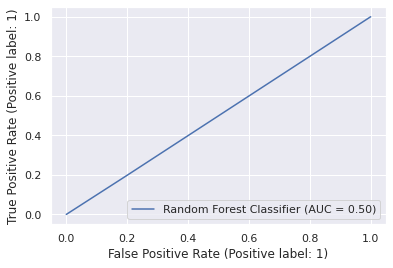

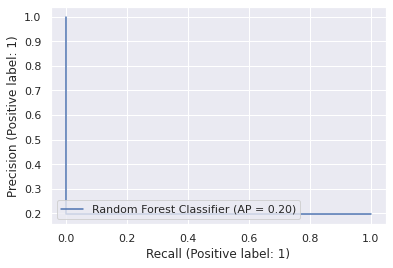

Confusion matrix:
[[364522  89942]
 [ 89795  21890]]


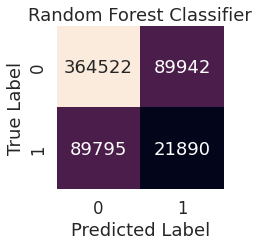

TP: 364522
FP: 89942
FN: 89795
TN: 21890
The FPR result: 0.8042599613706274
The TPR result: 0.8023516619452937
The TNR result: 0.19574003862937264
The FNR result: 0.1976483380547063
The AUC result: 0.5010862680706921
The ACC result: 0.6825270379352432
*********************************************************************************
*******************Result after applying GAN countermeasure**************
Result related to Logistic Regression:
The accuracy of Classification in train: 0.929 (0.001)
The accuracy of Classification in validation: 0.929 (0.001)
The accuracy of Classification in test: 0.929 (0.001)
**************************************************************************************************


In [ ]:
kfold = KFold(n_splits=10, random_state=10, shuffle=True)
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

t10=time.time()
for item in data_results:
    print("*********************************************************************************")
    #print("Result related to loop number : ",loop)
    print("Poisoning {}% of benign labels as malicious".format(int(item['Poisoned percent']*100)))
    
    Malware_Test = malware_test.copy(deep=True)
    Malware_Test.columns = cols
    row_of_Malware, column_of_Malware = Malware_Test.shape
    index_of_row = list(range(row_of_Malware))
    random.shuffle(index_of_row)

    number_of_row_to_change=int(int(row_of_Malware*item['Poisoned percent']))
    selected_row=index_of_row[0:number_of_row_to_change]
    
    for i, v in enumerate(numbers):
      for h, u in models:
        #h = models[0][0]
        model = u #models[0][1]
        item['Classifier'] = h
        print("*********************************************************************************")
        print("Model: {}".format(h))
        print("*********************************************************************************")
        print("*********************Selected features:",int(v) )
        print("******************************Result after attack *******************************")
        max_index_of_column=int(v)+1
        t0=time.time()
        rw_test,cl_test = X_test.shape
        Malware_Test = malware_test.copy(deep=True)
        Malware_Test.columns = cols

        counter_of_poisoned_point=0
        
        for m, value in enumerate(selected_row):
            flag=0
            for i, j in enumerate(ranked_index_of_benign[1:max_index_of_column]):
                for k, l in enumerate(original_selected):
                    if j == l:
                        Malware_Test.iloc[value, l] = np.float64(np.random.uniform(0, 1))
            counter_of_poisoned_point = counter_of_poisoned_point + 1
        
        Benign_Test = benign_test.copy(deep=True)
        Benign_Test.columns = cols
        poison_data = pd.concat([Benign_Test, Malware_Test])
        r,w=poison_data.shape
        Y_test=Y_test[0:r]
        
        t1=time.time()                   
        print("Time related to applying attack in this number of Features:",t1-t0)
        
        print("Number of poisoned Malware:", counter_of_poisoned_point)
        #********************* Compute Classification Accuracy in test*********************************
        scoring = 'accuracy'
        results = model_selection.cross_val_score(model, poison_data,Y_test, cv=kfold, scoring=scoring)
        print(("The accuracy of Classification in test: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Poisoned classification accuracy'].append([h, results])
        #********************* Compute Classification Accuracy in train********************************
        predictions = model.predict(poison_data)
        item['Poisoned predictions'].append([h, predictions])
        print("Classification_report by test:")
        cr = classification_report(Y_test, predictions)
        print(cr)
        #print(classification_report(Y_test, predictions))
        item['Poisoned classification report'].append([h, cr])
        #********************* Compute Logarithmic Loss in Test***********************************
        scoring = 'neg_log_loss'
        results = model_selection.cross_val_score(model, poison_data,Y_test, cv=kfold, scoring=scoring)
        print(("The Loss of Classification in test data:: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Poisoned logarithmic loss'].append([h, results])
        #********************* Compute Area Under ROC Curve in Test*******************************
        scoring = 'roc_auc'
        results = model_selection.cross_val_score(model, poison_data,Y_test, cv=kfold, scoring=scoring)
        print(("The Area Under ROC Curve in test: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Poisoned ROC AUC'].append([h, results])
        sns.set(font_scale=1)
        auc_curve =  RocCurveDisplay.from_predictions(Y_test, predictions, name=h)
        item['Poisoned AUC curve'].append([h, auc_curve])
        plt.show()
        precision_curve = PrecisionRecallDisplay.from_predictions(Y_test, predictions, name=h)
        item['Poisoned precision curve'].append([h, precision_curve])
        plt.show()
        #*****************************Compute FPR and TPR in Validation**************************
        cm=confusion_matrix(Y_test, predictions)
        print("Confusion matrix:")
        print(cm)
        item['Poisoned confusion matrix'].append([h, cm])
        plot_conf_matrix_from_matrix(cm, h)
        plt.show()
        TP=cm[0][0]
        print("TP:",TP)
        FP=cm[0][1]
        print("FP:",FP)
        FN=cm[1][0]
        print("FN:",FN)
        TN=cm[1][1]
        print("TN:",TN)
        FPR=FP/(FP+TN)
        print("The FPR result:", FPR)
        
        TPR=TP/(TP+FN)
        print("The TPR result:", TPR)
        
        TNR=TN/(TN+FP)
        print("The TNR result:", TNR)
        
        FNR=FN/(FN+TP)
        print("The FNR result:", FNR)
        
        AUC=1/(2*((TN/(TN+FP))+(TP/(TP+FP))))
        print("The AUC result:", AUC)
        
        ACC=(TP+TN)/(TP+TN+FP+FN)
        print("The ACC result:", ACC)
        
        #MCC=(TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
        #print("The Matthews correlation coefficient result=", MCC)
        
        print("*********************************************************************************")
        print("*******************Result after applying GAN countermeasure**************")
        t0=time.time()

        model2 = ExtraTreesClassifier(n_estimators=250,random_state=0)
        model2.fit(benign_train, cl_benign_train)
        importances = model2.feature_importances_
        indices = np.argsort(importances)[::-1]        

        importance_of_Features_in_benign_train=list()
        for f in range(69):
            importance_of_Features_in_benign_train.append(indices[f])

        #******************************Running the Logistic Regression and finding Some Samples Near to Hyperplain*****************************
        poison_model = LogisticRegression(max_iter=1000) 
        poison_model.fit(X_train,Y_train)
        print("Result related to Logistic Regression:")
        scoring = 'accuracy'
        poison_results = model_selection.cross_val_score(poison_model, X_train,Y_train, cv=kfold, scoring=scoring)
        print(("The accuracy of Classification in train: %.3f (%.3f)") % (poison_results.mean(), poison_results.std()))
        item['Poisoned logistic regression accuracy train'].append([h, poison_results])
        #********************* Compute Logistic Regression Accuracy in validation without change ***************************
        scoring = 'accuracy'
        results = model_selection.cross_val_score(poison_model, X_val,Y_val, cv=kfold, scoring=scoring)
        print(("The accuracy of Classification in validation: %.3f (%.3f)") % (poison_results.mean(), poison_results.std()))
        item['Poisoned logistic regression accuracy val'].append([h, results])
        #********************* Compute Logistic Regression Accuracy in test without change *********************************
        scoring = 'accuracy'
        results = model_selection.cross_val_score(poison_model, X_test,Y_test, cv=kfold, scoring=scoring)
        print(("The accuracy of Classification in test: %.3f (%.3f)") % (poison_results.mean(), poison_results.std()))
        item['Poisoned logistic regression accuracy test'].append([h, results])
        #**********************Declaration of Variables for finding decision value *************
        print("**************************************************************************************************")           
        temp = X_train.copy(deep=True)
        temp.columns = cols
        a,b = temp.shape
        rows_to_delete = list()
        decision_value=np.array([])
        selected_cl_malware_train=list()
        selected_malware_train = X_train.copy(deep=True)
        #**********************Finding malware_train and related decision value **********************************
        counter_of_malware_train=0
        count_deleted=0
        Y_train_list = Y_train.index.values.tolist()
        for k, j in enumerate(Y_train_list):
            row = pd.DataFrame([temp.iloc[k]])
            if Y_train[j] == 0:
                decision_value=np.append(decision_value,poison_model.decision_function(row))
                selected_cl_malware_train.insert(counter_of_malware_train, 0)
                counter_of_malware_train = counter_of_malware_train + 1
            else:
                rows_to_delete.append(selected_malware_train.index[k])
                count_deleted = count_deleted + 1 
        rows_to_delete.sort(reverse=True)
        selected_malware_train.drop(rows_to_delete, inplace=True)
        #**********************Sort the absolute value of decision value for malware_train*************************      
        decision_value=np.absolute(decision_value)
        indices=decision_value.argsort()
            
        #************** Declaration of Variables for selecting data*************************************************
        number_of_row_malware_train, number_of_column_malware_train = malware_train.shape
        number_of_row_selected_malware_train = int(row_of_Malware*item['Poisoned percent'])
        
        #****************Selecting index related to 10 percent of malware_train with minimum decision value*******
        Selected_rows_as_less_likely=list()
        Selected_rows_as_less_likely=indices[:number_of_row_selected_malware_train]

        malware_train_to_poison = malware_train.copy(deep=True)
        Malware_less_likely = pd.DataFrame(index=range(0), columns=cols)
        cl_less_likely = list()
        counter_for_cl_less_likely = 0            
        for i, row_number in enumerate(Selected_rows_as_less_likely):
            selected_row = pd.DataFrame([malware_train_to_poison.iloc[i]])
            Malware_less_likely = pd.concat([selected_row, Malware_less_likely])
            cl_less_likely.insert(counter_for_cl_less_likely, 0)
            counter_for_cl_less_likely = counter_for_cl_less_likely + 1
            
        number_of_row_in_Malware_less_likely, number_of_column_in_Malware_less_likely = Malware_less_likely.shape
        #****************Finding Benign like samples********************************************************************************
        poisoned_data = pd.DataFrame(index=range(0),columns=cols)
        c=0
        Malware_less_likely.head()
        for counter_of_Malware_less_likely in range(number_of_row_in_Malware_less_likely):
            selected_sample = pd.DataFrame([Malware_less_likely.iloc[counter_of_Malware_less_likely]])
            c=0
            for S in range(number_of_column_in_Malware_less_likely):
                    index_for_change=random.randint(0, number_of_column_in_Malware_less_likely - 1)
                    selected_sample.iloc[0, index_for_change] = 1 - selected_sample.iloc[0, index_for_change]
                    label = model.predict(selected_sample)
                    if label == int(1):
                        poisoned_data = pd.concat([selected_sample, poisoned_data])
                        c = c + 1
                        break       
            
        Number_of_row_in_poisoned_data, Number_of_column_in_poison_data = poisoned_data.shape
        Y_poison = list()
        for index in range(Number_of_row_in_poisoned_data):
            Y_poison.append(0)
        #***************************************************************************************************************************
        
        poisoned_data_X = poisoned_data.copy(deep=True)
        poisoned_data_X.columns = cols

        poisoned_data_Y = pd.DataFrame (Y_poison[:], columns = ['Label'])

        second_test_set=0.2
        seed = 10
        X_poisoned_train, X_poisoned_test, Y_poisoned_train, Y_poisoned_test = train_test_split(poisoned_data_X, poisoned_data_Y, test_size=second_test_set, random_state=seed)
        X_poisoned_train.columns = cols
        X_poisoned_test.columns = cols

        Y_poisoned_train = Y_poisoned_train.squeeze()
        Y_poisoned_test = Y_poisoned_test.squeeze()

        poison_data_for_retraining = pd.concat([X_train, X_poisoned_train])
        poison_Class_for_retraining = pd.concat([Y_train, Y_poisoned_train])
        poison_Class_for_retraining.columns = ['Label']
        
        num_trees = 100
        max_features = 3
        kfold = KFold(n_splits=10, random_state=10, shuffle=True)
        model_for_counter_measure = u #models[0][1]
        model_for_counter_measure.fit(poison_data_for_retraining, poison_Class_for_retraining)
        item['Cleaned model'].append([h, model_for_counter_measure])
        poison_data_for_test_after_retraining = pd.concat([X_test, X_poisoned_test])
        poison_Class_for_test_after_retraining= pd.concat([Y_test, Y_poisoned_test])
        poison_Class_for_test_after_retraining.columns = ['Label']

        t1=time.time()
        print("Time related to applying GAN countermeasure in this number of Features:", t1-t0)
        #********************* Compute Classification Accuracy in test*********************************
        scoring = 'accuracy'
        results = model_selection.cross_val_score(model_for_counter_measure, poison_data_for_test_after_retraining,poison_Class_for_test_after_retraining, cv=kfold, scoring=scoring)
        print(("The accuracy of Classification in test: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Cleaned classification accuracy'].append([h, results])
        #********************* Compute Classification Accuracy in train********************************
        predictions = model.predict(poison_data_for_test_after_retraining)
        item['Cleaned X_test data'].append([h, poison_data_for_test_after_retraining])
        item['Cleaned Y_test data'].append([h, poison_Class_for_test_after_retraining])
        item['Cleaned predictions'].append([h, predictions])
        print("classification_report by test:")
        cr = classification_report(poison_Class_for_test_after_retraining, predictions)
        print(cr)
        # print(classification_report(poison_Class_for_test_after_retraining, predictions))
        item['Cleaned classification report'].append([h, cr])
        #********************* Compute Logarithmic Loss in Test***********************************
        scoring = 'neg_log_loss'
        results = model_selection.cross_val_score(model_for_counter_measure, poison_data_for_test_after_retraining , poison_Class_for_test_after_retraining, cv=kfold, scoring=scoring)
        print(("The Loss of Classification in test data: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Cleaned logarithmic loss'].append([h, results])
        #********************* Compute Area Under ROC Curve in Test*******************************
        scoring = 'roc_auc'
        results = model_selection.cross_val_score(model_for_counter_measure, poison_data_for_test_after_retraining , poison_Class_for_test_after_retraining, cv=kfold, scoring=scoring)
        print(("The Area Under ROC Curve in test: %.3f (%.3f)") % (results.mean(), results.std()))
        item['Cleaned ROC AUC'].append([h, results])
        sns.set(font_scale=1)
        auc_curve =  RocCurveDisplay.from_predictions(poison_Class_for_test_after_retraining, predictions, name=h)
        item['Cleaned AUC curve'].append([h, auc_curve])
        plt.show()
        precision_curve = PrecisionRecallDisplay.from_predictions(poison_Class_for_test_after_retraining, predictions, name=h)
        item['Cleaned precision curve'].append([h, precision_curve])
        plt.show()
        #*****************************Compute FPR and TPR in Validation**************************
        cm=confusion_matrix(poison_Class_for_test_after_retraining, predictions)
        print("Confusion matrix:")
        print(cm)
        item['Cleaned confusion matrix'].append([h, cm])
        #plot_conf_matrix(poison_Class_for_test_after_retraining, predictions)
        plot_conf_matrix_from_matrix(cm, h)
        plt.show()
        TP=cm[0][0]
        print("TP:",TP)
        FP=cm[0][1]
        print("FP:",FP)
        FN=cm[1][0]
        print("FN:",FN)
        TN=cm[1][1]
        print("TN:",TN)
        FPR=FP/(FP+TN)
        print("The FPR result:", FPR)
        
        TPR=TP/(TP+FN)
        print("The TPR result:", TPR)
        
        TNR=TN/(TN+FP)
        print("The TNR result:", TNR)
        
        FNR=FN/(FN+TP)
        print("The FNR result:", FNR)
        
        AUC=1/(2*((TN/(TN+FP))+(TP/(TP+FP))))
        print("The AUC result:", AUC)
        
        ACC=(TP+TN)/(TP+TN+FP+FN)
        print("The ACC result:", ACC)
        
        #MCC=(TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
        #print("The Matthews correlation coefficient result:", MCC)

        print("Result Related to this Numbers of features is finished:",int(v))
        Malware_Test = malware_test.copy(deep=True) 
        Malware_Test.columns = cols
        selected_row = index_of_row[0:number_of_row_to_change]
        original_selected=ranked_index[1:69]
    print("End of poisoning", item['Poisoned percent'])
    print("*********************************************************************************")
    t11=time.time()
print("Time related to applying attack in this number of Features:", t11-t10)

In [ ]:
# final_results_05_filename = '/content/drive/MyDrive/Dissertation/final_05_results.sav'
# pickle.dump(data_results, open(final_results_05_filename, 'wb'))